In [2]:
#In this case study, we're going to various applications of unsupervised learning methods
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [7]:
#1: PCA for Visualization

In [8]:
#Let's import the digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [41]:
#We'll project this from 64-dim to 2-dim via PCA
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


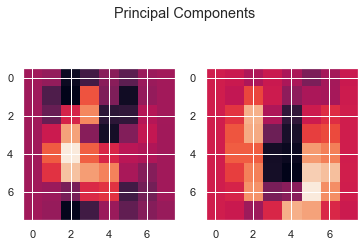

In [42]:
#Let's visualize the first 2 principal components
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Principal Components')
ax1.imshow(np.reshape(pca.components_[0],(8,8)))
ax2.imshow(np.reshape(pca.components_[1],(8,8)))

Text(0, 0.5, '2-dim\nreconstruction')

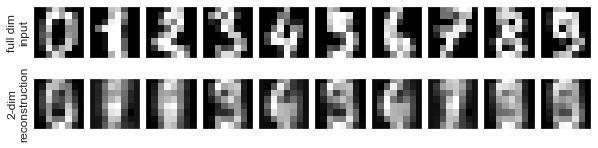

In [43]:
#Let's visualize what the figures look like, projected on to the 2-dim subspace of R^64
inv_proj = pca.inverse_transform(projected)
fig, ax = plt.subplots(2,10,figsize=(10,2.5),subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(digits.data[i].reshape(8,8),cmap='binary_r')
    ax[1,i].imshow(inv_proj[i].reshape(8,8), cmap='binary_r')
    
ax[0,0].set_ylabel('full dim\ninput')
ax[1,0].set_ylabel('2-dim\nreconstruction')

In [44]:
#Challenge 1: Fit a linear model or a tree to the PROJECTED data. How does the accuracy compare to the model
#trained on the full data set? What if we use more projected components?

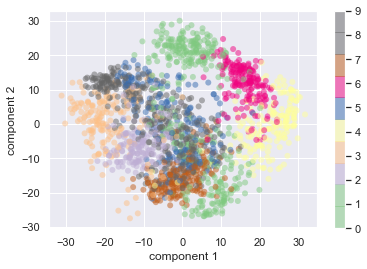

In [15]:
#Let's plot the 2-d projection
plt.scatter(projected[:,0], projected[:,1], c = digits.target, edgecolor='none', alpha = 0.5, cmap=plt.cm.get_cmap('Accent',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

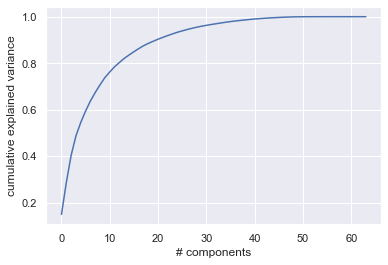

In [16]:
#Finally, we plot the cumulative sum of the explained variance
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [22]:
#2: PCA as Noise Filtering

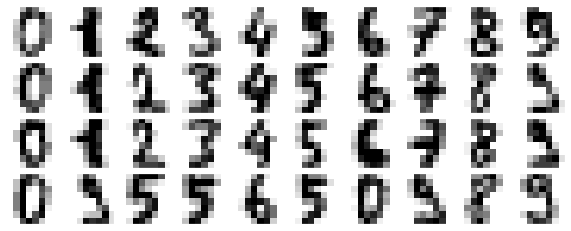

In [23]:
#Let's plot some of the figures...
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap = 'binary', interpolation='nearest', clim=(0,16))
plot_digits(digits.data)

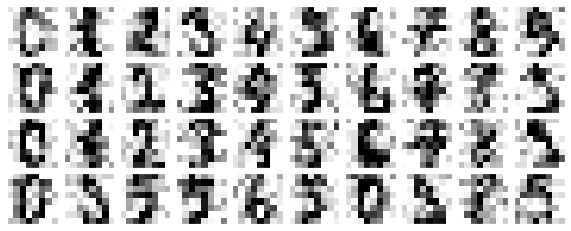

In [24]:
#Now we'll add some noise and plot the results.
np.random.seed(42)
noisy = np.random.normal(digits.data,4)
plot_digits(noisy)

In [25]:
#We now fit pca to get 50% of the explained variance, which happens to require 12 principal components
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

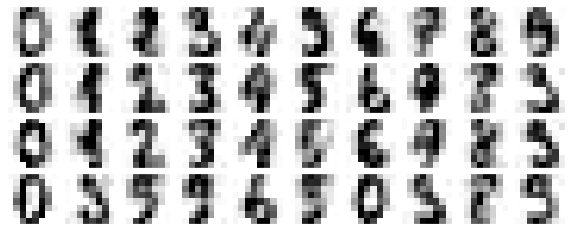

In [26]:
#Let's see what we get...not bad!
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [ ]:
#Challenge 2: Try the noise experiment with only a single digit, say '2'. Do you get better reconstruction
#with a single digit or with the full dataset?

In [50]:
#Let's use PCA on a set of images of famous people
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Lleyton Hewitt']
(845, 62, 47)


In [51]:
#We'll use RandomizedPCA to speed things up
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

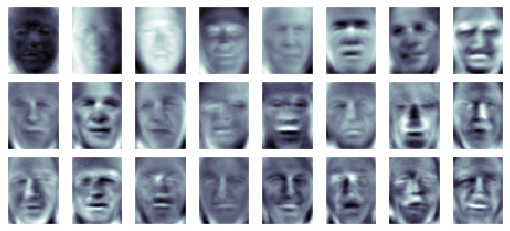

In [52]:
#We plot the components...
fig, axes = plt.subplots(3,8,figsize=(9,4),subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

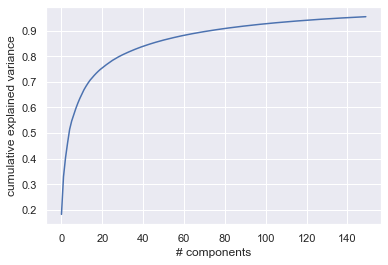

In [53]:
#Considering the explained variance, we see that over 90% of the variance is explained with 150 components. 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [54]:
#Let's visualize the projections
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

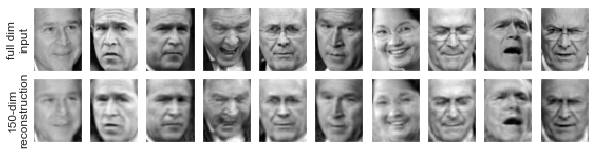

In [55]:
#We see that they are pretty good!
fig, ax = plt.subplots(2,10,figsize=(10,2.5),subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47),cmap='binary_r')
    
ax[0,0].set_ylabel('full dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')

In [58]:
#Challenge 3: You can access the class labels for the faces via faces.target. Use your favorite supervised learning
#method to build a model for predicting faces (use a train-test split). Compare the results on the original faces
# and the PCA projection.

(478, 726, 4)


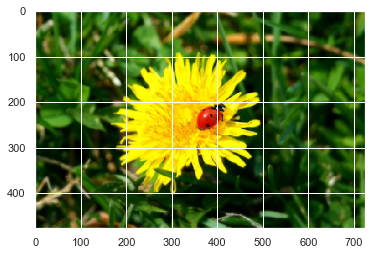

In [3]:
#Clustering and Image Segmentation
from matplotlib.image import imread
image = imread("ladybug.png")
plt.imshow(image)
print(image.shape)

In [11]:
from sklearn.cluster import KMeans
X = image.reshape(-1,4)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

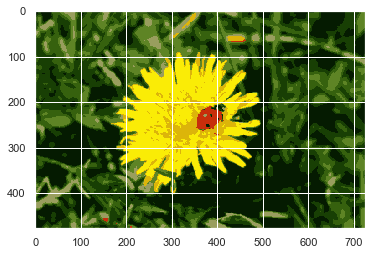

In [12]:
plt.imshow(segmented_img)

In [ ]:
#Challenge 4: This segmentation uses only the color data. What if we also want our segments to be spatially
#segmented? Can you find an easy way to do this?